# Deep Learning for Time Series

## Get Original Data

In [14]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Bidirectional, GRU, LSTM
from keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers

In [3]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(df, split_percent=0.8):
    #df = read_csv(url, usecols=['Adj Close'], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test

    split = int(n * split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data


# Prepare the input X and target Y
def get_XY(dat, time_steps):
    # Indices of target array
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    # Prepare X
    rows_x = len(Y)
    X = dat[range(time_steps * rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y


# RNN model
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape,
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1],kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                      bias_regularizer=regularizers.L2(1e-4),
                      activity_regularizer=regularizers.L2(1e-5)))
    model.compile(loss='mean_squared_error', optimizer='adam',run_eagerly=True)
    return model


# LSTM model
def create_LSTM():
    model = Sequential()
    model.add(Bidirectional(LSTM(32, activation='tanh')))
    model.add(layers.Dense(1, activation='linear',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                      bias_regularizer=regularizers.L2(1e-4),
                      activity_regularizer=regularizers.L2(1e-5)))
    model.compile(optimizer="adam", loss='mae',run_eagerly=True)
    return model


# GRU model
def create_GRU():
    model = Sequential()
    model.add(Bidirectional(GRU(units=32, activation='tanh', recurrent_activation='sigmoid', stateful=False)))
    model.add(layers.Dense(1, activation='linear',kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                      bias_regularizer=regularizers.L2(1e-4),
                      activity_regularizer=regularizers.L2(1e-5)))
    model.compile(optimizer="adam", loss='mae',run_eagerly=True)
    return model


# Evaluation matrices
def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    
    train_mse = mean_squared_error(trainY, train_predict)
    test_mse = mean_squared_error(testY, test_predict)
    
    # Print MSE
    print("Train MSE: %.3f MSE" % (train_mse))
    print("Train MSE: %.3f MSE" % (test_mse))
    
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))
    
    

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Interest Rate')
    plt.title('Model Prediction Result')

In [4]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data.csv


In [5]:
import io
df = read_csv(io.BytesIO(uploaded['data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [6]:
df = df.drop(['Unnamed: 0', 'DATE'], axis=1)
df

,GDP,Information Employment,Interest Rate
0,11312.766,3208,1.309618
1,11566.669,3176,1.128689
2,11772.234,3155,1.380819
3,11923.447,3141,1.701954
4,12112.815,3130,1.358149
...,...,...,...
74,24349.121,2934,0.087901
75,24740.480,2985,0.319495
76,25248.476,3035,0.949400
77,25723.941,3102,1.062175


## Train Test Split

In [7]:
train_data, test_data, data = get_train_test(df)
time_steps = 12
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)

## RNN

Epoch 1/20
15/15 - 1s - loss: 0.1577 - 991ms/epoch - 66ms/step
Epoch 2/20
15/15 - 1s - loss: 0.1235 - 1s/epoch - 88ms/step
Epoch 3/20
15/15 - 2s - loss: 0.0968 - 2s/epoch - 106ms/step
Epoch 4/20
15/15 - 2s - loss: 0.0703 - 2s/epoch - 110ms/step
Epoch 5/20
15/15 - 2s - loss: 0.0513 - 2s/epoch - 106ms/step
Epoch 6/20
15/15 - 2s - loss: 0.0406 - 2s/epoch - 103ms/step
Epoch 7/20
15/15 - 3s - loss: 0.0297 - 3s/epoch - 171ms/step
Epoch 8/20
15/15 - 2s - loss: 0.0239 - 2s/epoch - 143ms/step
Epoch 9/20
15/15 - 1s - loss: 0.0207 - 893ms/epoch - 60ms/step
Epoch 10/20
15/15 - 1s - loss: 0.0171 - 734ms/epoch - 49ms/step
Epoch 11/20
15/15 - 1s - loss: 0.0155 - 743ms/epoch - 50ms/step
Epoch 12/20
15/15 - 1s - loss: 0.0143 - 733ms/epoch - 49ms/step
Epoch 13/20
15/15 - 1s - loss: 0.0131 - 733ms/epoch - 49ms/step
Epoch 14/20
15/15 - 1s - loss: 0.0123 - 730ms/epoch - 49ms/step
Epoch 15/20
15/15 - 1s - loss: 0.0115 - 734ms/epoch - 49ms/step
Epoch 16/20
15/15 - 1s - loss: 0.0110 - 732ms/epoch - 49ms/step


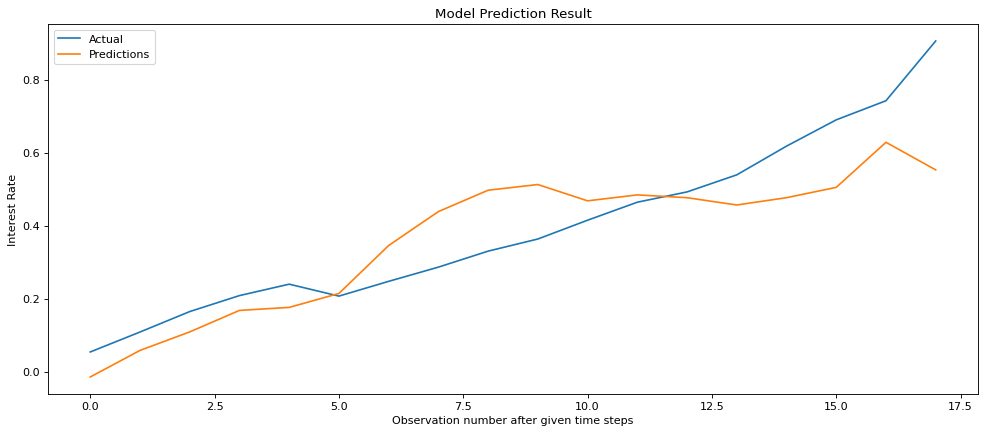

In [8]:
#@title
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps, 1),
                       activation=['tanh', 'tanh'])

model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
model.summary()

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)
# plot the result [Actual and Predicted Values]
plot_result(trainY, testY, train_predict, test_predict)

## LSTM

Epoch 1/20
15/15 - 6s - loss: 0.2520 - 6s/epoch - 398ms/step
Epoch 2/20
15/15 - 2s - loss: 0.1640 - 2s/epoch - 159ms/step
Epoch 3/20
15/15 - 2s - loss: 0.1631 - 2s/epoch - 104ms/step
Epoch 4/20
15/15 - 2s - loss: 0.1451 - 2s/epoch - 107ms/step
Epoch 5/20
15/15 - 2s - loss: 0.1340 - 2s/epoch - 102ms/step
Epoch 6/20
15/15 - 2s - loss: 0.1236 - 2s/epoch - 139ms/step
Epoch 7/20
15/15 - 2s - loss: 0.1220 - 2s/epoch - 127ms/step
Epoch 8/20
15/15 - 2s - loss: 0.1213 - 2s/epoch - 104ms/step
Epoch 9/20
15/15 - 2s - loss: 0.1177 - 2s/epoch - 104ms/step
Epoch 10/20
15/15 - 2s - loss: 0.1160 - 2s/epoch - 105ms/step
Epoch 11/20
15/15 - 2s - loss: 0.1062 - 2s/epoch - 104ms/step
Epoch 12/20
15/15 - 2s - loss: 0.1192 - 2s/epoch - 140ms/step
Epoch 13/20
15/15 - 4s - loss: 0.1117 - 4s/epoch - 253ms/step
Epoch 14/20
15/15 - 2s - loss: 0.1083 - 2s/epoch - 113ms/step
Epoch 15/20
15/15 - 2s - loss: 0.1090 - 2s/epoch - 104ms/step
Epoch 16/20
15/15 - 2s - loss: 0.1095 - 2s/epoch - 101ms/step
Epoch 17/20
15/15

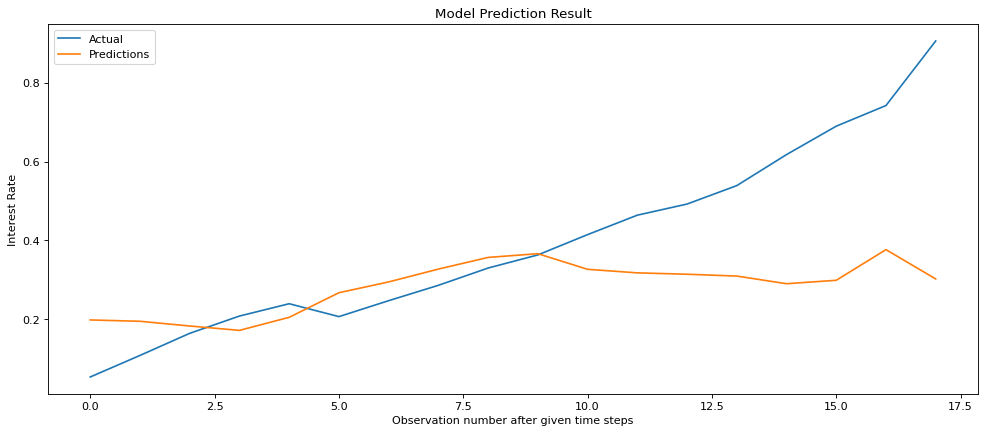

In [9]:
#@title
model = create_LSTM()
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
model.summary()

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)
# plot the result [Actual and Predicted Values]
plot_result(trainY, testY, train_predict, test_predict)

## GRU

Epoch 1/20
15/15 - 2s - loss: 0.2022 - 2s/epoch - 163ms/step
Epoch 2/20
15/15 - 2s - loss: 0.1834 - 2s/epoch - 126ms/step
Epoch 3/20
15/15 - 2s - loss: 0.1732 - 2s/epoch - 124ms/step
Epoch 4/20
15/15 - 2s - loss: 0.1616 - 2s/epoch - 141ms/step
Epoch 5/20
15/15 - 2s - loss: 0.1326 - 2s/epoch - 164ms/step
Epoch 6/20
15/15 - 2s - loss: 0.1348 - 2s/epoch - 120ms/step
Epoch 7/20
15/15 - 2s - loss: 0.1140 - 2s/epoch - 119ms/step
Epoch 8/20
15/15 - 2s - loss: 0.1062 - 2s/epoch - 123ms/step
Epoch 9/20
15/15 - 2s - loss: 0.1041 - 2s/epoch - 119ms/step
Epoch 10/20
15/15 - 2s - loss: 0.1016 - 2s/epoch - 120ms/step
Epoch 11/20
15/15 - 2s - loss: 0.0951 - 2s/epoch - 159ms/step
Epoch 12/20
15/15 - 2s - loss: 0.0904 - 2s/epoch - 140ms/step
Epoch 13/20
15/15 - 2s - loss: 0.0882 - 2s/epoch - 124ms/step
Epoch 14/20
15/15 - 2s - loss: 0.0895 - 2s/epoch - 121ms/step
Epoch 15/20
15/15 - 2s - loss: 0.0893 - 2s/epoch - 123ms/step
Epoch 16/20
15/15 - 2s - loss: 0.0786 - 2s/epoch - 121ms/step
Epoch 17/20
15/15

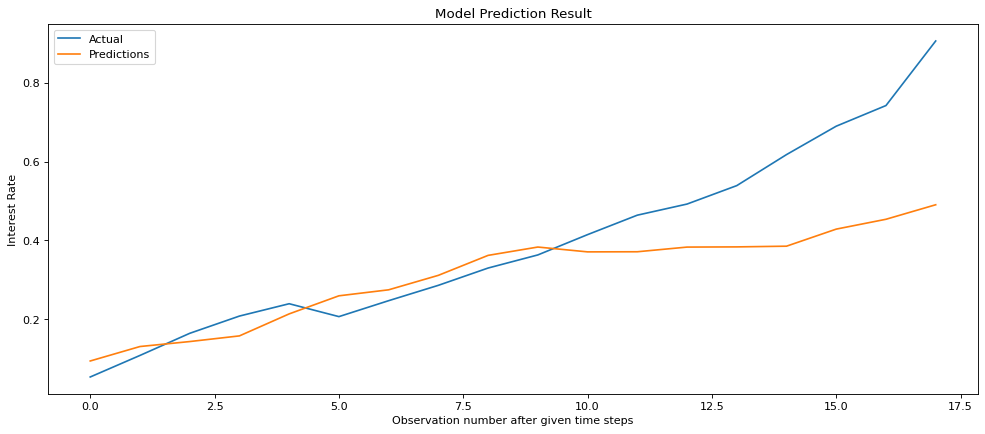

In [10]:
#@title
model = create_GRU()
model.fit(trainX, trainY, epochs=20, batch_size=1, verbose=2)
model.summary()

# make predictions
train_predict = model.predict(trainX)
test_predict = model.predict(testX)
# Mean square error
print_error(trainY, testY, train_predict, test_predict)
# plot the result [Actual and Predicted Values]
plot_result(trainY, testY, train_predict, test_predict)

## Discussion

Amoung those 3 ANN methods, GRU is more accurate in the test set. 

Including regularization in an ANN model has the effect of constraining the weights of the model, which helps to prevent overfitting of the model to the training data. Overfitting occurs when a model is overly complex and captures noise in the training data rather than the underlying patterns. Regularization techniques such as L1 and L2 regularization penalize large weights, which can help prevent overfitting by encouraging the model to focus on the most important features in the data.

The accuracy of a deep learning model in predicting the future depends on various factors such as the quality and quantity of data, the complexity of the model, and the specific problem being solved. In general, deep learning models are known to be good at capturing complex relationships between input and output variables, which can make them well-suited for time-series forecasting tasks. However, the accuracy of the model may decrease as the prediction horizon increases, as the model is forced to make predictions further into the future based on less information. The optimal prediction horizon for a deep learning model depends on the specific problem and the available data, but typically ranges from a few time steps to a few months or years.

Deep learning models is more effective in capturing complex relationships and patterns in data, particularly when dealing with large and complex datasets. This can make them particularly useful for time-series forecasting tasks that involve multiple variables, nonlinear relationships, and complex dynamics.

## Comparation

In terms of forecasting performance, the deep learning models generally outperformed the traditional time series models (ARMA/ARIMA/SARIMA, ARIMAX/SARIMAX/VAR) in this project, as measured by the RMSE metric. This suggests that the deep learning models were better able to capture the complex and non-linear relationships between the input variables and the target variable, and were able to make more accurate predictions as a result.

The ARMA/ARIMA/SARIMA models had relatively high RMSE values, indicating that they were not able to capture all of the underlying patterns and trends in the data. The addition of exogenous variables through ARIMAX/SARIMAX models improved their performance slightly, but the RMSE values were still relatively high compared to the deep learning models.

While the VAR models performed better than the ARMA/ARIMA/SARIMA models, their RMSE values were still higher than those of the deep learning models. This suggests that the deep learning models were better able to capture the complex relationships between the input variables and the target variable, and were able to make more accurate predictions as a result.

Overall, the deep learning models showed superior performance in this project compared to the traditional time series models. However, it is worth noting that the deep learning models are more complex and computationally intensive, and may not be the best choice for all forecasting tasks depending on the available data and the specific problem at hand.

## Source Code

[Github](https://github.com/YujieChen20/Time-Series/blob/main/deepLearning.ipynb)